CLASSIFIER A

Label counts for Classifier A:
  Class 0 (Prompt collapse): 90 samples
  Class 1 (Other): 287 samples

Classifier A (Validation Set):
Accuracy: 0.9605, MCC: 0.8901


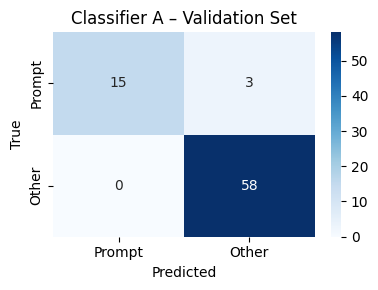


Classifier A (Total Set):
Accuracy: 0.9920, MCC: 0.9781


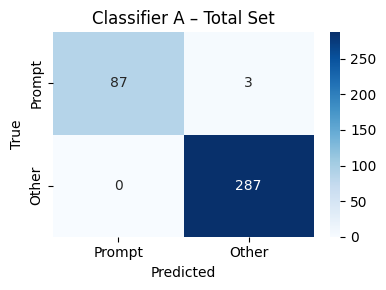

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load dataset ===
df = pd.read_json("dataset_classA.json")
df = df[df['CollapseTime'].notna()].copy()

# === Step 2: Define binary labels ===
# label_A: 0 = Prompt collapse (t < 1 ms), 1 = Other
df['label_A'] = df['CollapseTime'].apply(lambda t: 0 if t < 0.001 else 1)

# === Step 3: Show label counts ===
print("Label counts for Classifier A:")
for label, count in df['label_A'].value_counts().sort_index().items():
    label_name = "Prompt collapse" if label == 0 else "Other"
    print(f"  Class {label} ({label_name}): {count} samples")

# === Step 4: Select features and labels ===
features = ['Mtot', 'Mratio_fixed', 'LambdaTilde', 'ChiEff']
X = df[features]
y = df['label_A']

# === Step 5: Train-validation split (stratified) ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Step 6: Scale ===
scaler_A = StandardScaler()
X_train_scaled = scaler_A.fit_transform(X_train)
X_val_scaled = scaler_A.transform(X_val)
X_all_scaled = scaler_A.transform(X)

# === Step 7: Train model ===
model_A = GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=42)
model_A.fit(X_train_scaled, y_train)

# === Step 8: Evaluate on validation set ===
y_val_pred = model_A.predict(X_val_scaled)
acc_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)

# === Step 9: Evaluate on total set ===
y_all_pred = model_A.predict(X_all_scaled)
acc_all = accuracy_score(y, y_all_pred)
mcc_all = matthews_corrcoef(y, y_all_pred)

# === Step 10: Confusion Matrix Plotting ===
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Prompt", "Other"], yticklabels=["Prompt", "Other"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

print("\nClassifier A (Validation Set):")
print(f"Accuracy: {acc_val:.4f}, MCC: {mcc_val:.4f}")
plot_confusion(y_val, y_val_pred, "Classifier A – Validation Set")

print("\nClassifier A (Total Set):")
print(f"Accuracy: {acc_all:.4f}, MCC: {mcc_all:.4f}")
plot_confusion(y, y_all_pred, "Classifier A – Total Set")

In [ ]:
df

,Mtot,Mratio,LambdaTilde,EOS,ChiEff,RemnantKey,CollapseTime,Mratio_fixed,label_A
0,2.530,0.730,1335.000,125H,0.0,greater,0.007715,1.369863,1
1,2.710,0.860,290.000,B,0.0,None,0.001217,1.162791,1
2,2.720,0.800,422.000,HB,0.0,greater,0.007698,1.250000,1
3,2.730,0.750,837.000,125H,0.0,greater,0.007578,1.333333,1
4,2.710,0.860,423.000,HB,0.0,greater,0.006876,1.162791,1
...,...,...,...,...,...,...,...,...,...
407,3.438,1.670,247.763,DD2,0.0,None,0.000347,1.670000,0
408,3.351,1.330,104.653,SFHo,0.0,None,0.000126,1.330000,0
409,3.322,1.180,90.538,Sly4,0.0,None,0.000114,1.180000,0
410,3.351,1.330,93.140,Sly4,0.0,None,0.000114,1.330000,0


CLASSIFIER B

Label counts for Classifier B:
label_B
0     90
1    206
2     22
Name: count, dtype: int64

Classifier B (Validation Set):
Accuracy: 0.9062, MCC: 0.8144

Classifier B (Total Set):
Accuracy: 0.9811, MCC: 0.9620


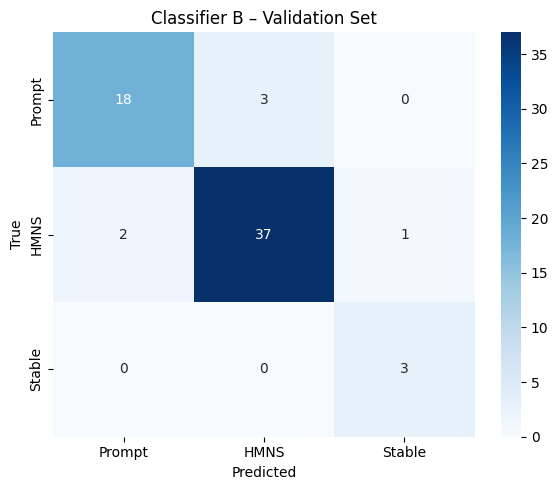

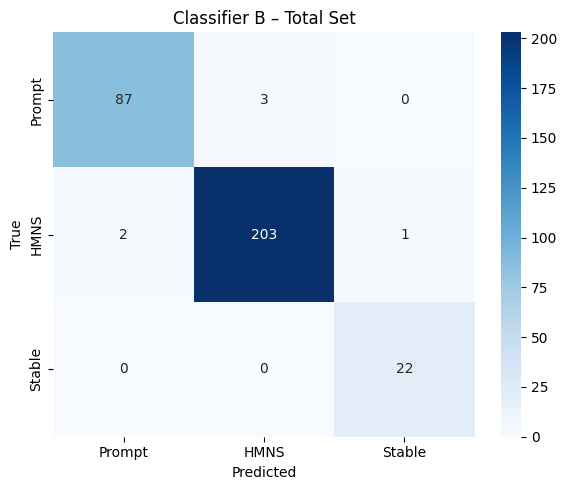

In [2]:

# === Step 1: Load dataset ===
df = pd.read_json("dataset_classBandC.json")

# === Step 2: Define 3-class mapping based on CollapseTime and RemnantKey ===
def map_label_B(row):
    ct = row['CollapseTime']
    rk = row['RemnantKey']

    if rk == 'prompt' or (pd.notna(ct) and ct < 0.001):
        return 0  # Prompt collapse
    elif 0.001 <= ct < 0.1:
        return 1  # HMNS (short + long)
    else:
        return 2  # Stable

df['label_B'] = df.apply(map_label_B, axis=1)

# === Step 3: Show label counts ===
print("Label counts for Classifier B:")
print(df['label_B'].value_counts().sort_index())

# === Step 4: Select features and labels ===
features = ['Mtot', 'Mratio_fixed', 'LambdaTilde', 'ChiEff']
X = df[features]
y = df['label_B']

# === Step 5: Split into train and validation sets (no stratification) ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 6: Scale features ===
scaler_B = StandardScaler()
X_train_scaled = scaler_B.fit_transform(X_train)
X_val_scaled = scaler_B.transform(X_val)
X_all_scaled = scaler_B.transform(X)

# === Step 7: Train Classifier B ===
model_B = GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=42)
model_B.fit(X_train_scaled, y_train)

# === Step 8: Evaluate on validation set ===
y_val_pred = model_B.predict(X_val_scaled)
acc_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
print("\nClassifier B (Validation Set):")
print(f"Accuracy: {acc_val:.4f}, MCC: {mcc_val:.4f}")

# === Step 9: Evaluate on full dataset ===
y_all_pred = model_B.predict(X_all_scaled)
acc_all = accuracy_score(y, y_all_pred)
mcc_all = matthews_corrcoef(y, y_all_pred)
print("\nClassifier B (Total Set):")
print(f"Accuracy: {acc_all:.4f}, MCC: {mcc_all:.4f}")

# === Step 10: Plot confusion matrices ===
def plot_conf(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Prompt", "HMNS", "Stable"],
                yticklabels=["Prompt", "HMNS", "Stable"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf(y_val, y_val_pred, "Classifier B – Validation Set")
plot_conf(y, y_all_pred, "Classifier B – Total Set")

In [ ]:
 df

,Mtot,Mratio,LambdaTilde,EOS,ChiEff,RemnantKey,CollapseTime,Mratio_fixed,label_B
1,2.710,0.86,290.000,B,0.0,None,0.001217,1.162791,1
10,2.740,0.73,291.000,B,0.0,None,0.001069,1.369863,1
25,2.500,1.00,1875.000,15H,0.0,stable,0.012198,1.000000,1
28,2.730,0.75,285.000,B,0.0,None,0.001094,1.333333,1
34,2.700,1.00,289.000,B,0.0,None,0.001520,1.000000,1
...,...,...,...,...,...,...,...,...,...
406,3.322,1.18,256.534,DD2,0.0,None,0.000445,1.180000,0
407,3.438,1.67,247.763,DD2,0.0,None,0.000347,1.670000,0
408,3.351,1.33,104.653,SFHo,0.0,None,0.000126,1.330000,0
409,3.322,1.18,90.538,Sly4,0.0,None,0.000114,1.180000,0


CLASSIFIER C

Label counts for Classifier C:
  Class 0: 90 samples
  Class 1: 108 samples
  Class 2: 98 samples
  Class 3: 22 samples

Classifier C (Validation Set):
Accuracy: 0.7031, MCC: 0.5771

Classifier C (Total Set):
Accuracy: 0.9371, MCC: 0.9109


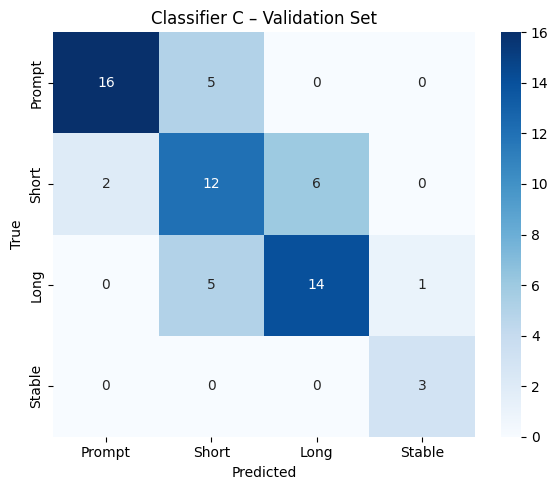

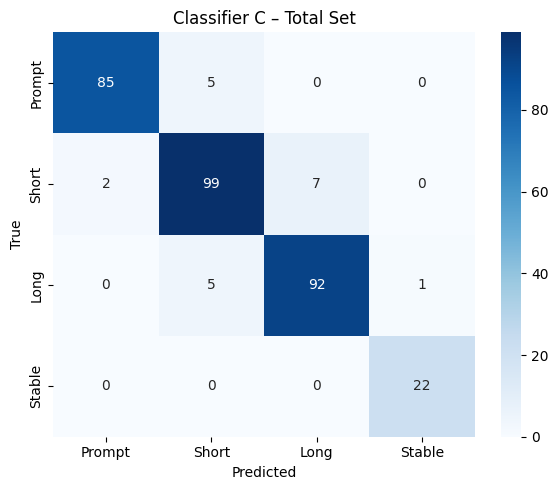

In [3]:

# === Step 1: Load dataset ===
df = pd.read_json("dataset_classBandC.json")

# === Step 2: Define 4-class label based on CollapseTime and RemnantKey ===
def map_label_C(row):
    ct = row['CollapseTime']
    rk = row['RemnantKey']

    if rk == 'prompt' or (pd.notna(ct) and ct < 0.001):
        return 0  # Prompt collapse
    elif 0.001 <= ct < 0.01:
        return 1  # Short-lived HMNS
    elif 0.01 <= ct < 0.1:
        return 2  # Long-lived HMNS
    else:
        return 3  # Stable NS

df['label_C'] = df.apply(map_label_C, axis=1)

# === Step 3: Show label counts ===
print("Label counts for Classifier C:")
for label, count in df['label_C'].value_counts().sort_index().items():
    print(f"  Class {label}: {count} samples")

# === Step 4: Select features and labels ===
features = ['Mtot', 'Mratio_fixed', 'LambdaTilde', 'ChiEff']
X = df[features]
y = df['label_C']

# === Step 5: Train-validation split (no stratification) ===
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 6: Scale ===
scaler_C = StandardScaler()
X_train_scaled = scaler_C.fit_transform(X_train)
X_val_scaled = scaler_C.transform(X_val)
X_all_scaled = scaler_C.transform(X)

# === Step 7: Train Classifier C ===
model_C = GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=42)
model_C.fit(X_train_scaled, y_train)

# === Step 8: Evaluate on validation set ===
y_val_pred = model_C.predict(X_val_scaled)
acc_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
print("\nClassifier C (Validation Set):")
print(f"Accuracy: {acc_val:.4f}, MCC: {mcc_val:.4f}")

# === Step 9: Evaluate on total set ===
y_all_pred = model_C.predict(X_all_scaled)
acc_all = accuracy_score(y, y_all_pred)
mcc_all = matthews_corrcoef(y, y_all_pred)
print("\nClassifier C (Total Set):")
print(f"Accuracy: {acc_all:.4f}, MCC: {mcc_all:.4f}")

# === Step 10: Confusion matrix ===
def plot_conf(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Prompt", "Short", "Long", "Stable"],
                yticklabels=["Prompt", "Short", "Long", "Stable"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf(y_val, y_val_pred, "Classifier C – Validation Set")
plot_conf(y, y_all_pred, "Classifier C – Total Set")

PREDICTIONS

In [4]:
import h5py
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from collections import Counter

# === Step 1: Load posterior samples from GW170817 ===
with h5py.File("GW170817.h5", "r") as f:
    samples_17 = f["IMRPhenomPv2NRT_lowSpin_posterior"][()]
    df_17 = pd.DataFrame(samples_17)

# === Step 2: Compute derived GW features ===
df_17["m1"] = df_17["m1_detector_frame_Msun"] #divide it by (1+z), find z using z_at_value func.
df_17["m2"] = df_17["m2_detector_frame_Msun"] #same as above
df_17["Mtot"] = df_17["m1"] + df_17["m2"]
df_17["Mratio_fixed"] = df_17["m1"] / df_17["m2"]
df_17["LambdaTilde"] = (
    (16 / 13) * (
        (df_17["m1"] + 12 * df_17["m2"]) * df_17["lambda1"] +
        (df_17["m2"] + 12 * df_17["m1"]) * df_17["lambda2"]
    ) / (df_17["Mtot"] ** 5)
)
df_17["ChiEff"] = (
    df_17["m1"] * df_17["spin1"] * df_17["costilt1"] +
    df_17["m2"] * df_17["spin2"] * df_17["costilt2"]
) / df_17["Mtot"]

# === Step 3: Select cleaned features ===
features = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
df_17 = df_17[features].replace([np.inf, -np.inf], np.nan).dropna()

# === Step 4: Scale ===
X_17_A = scaler_A.transform(df_17)
X_17_B = scaler_B.transform(df_17)
X_17_C = scaler_C.transform(df_17)

# === Step 5: Predict ===
pred_17_A = model_A.predict(X_17_A)
pred_17_B = model_B.predict(X_17_B)
pred_17_C = model_C.predict(X_17_C)

prob_17_A = model_A.predict_proba(X_17_A)
prob_17_B = model_B.predict_proba(X_17_B)
prob_17_C = model_C.predict_proba(X_17_C)

# === Step 6: Display ===
print("\n--- GW170817 Predictions ---")
print("Classifier A:", dict(Counter(pred_17_A)))
print("Classifier B:", dict(Counter(pred_17_B)))
print("Classifier C:", dict(Counter(pred_17_C)))


--- GW170817 Predictions ---
Classifier A: {np.int64(0): 7395, np.int64(1): 683}
Classifier B: {np.int64(0): 7704, np.int64(1): 374}
Classifier C: {np.int64(0): 7704, np.int64(1): 318, np.int64(2): 56}


In [ ]:
df_17

,costheta_jn,luminosity_distance_Mpc,right_ascension,declination,m1_detector_frame_Msun,m2_detector_frame_Msun,lambda1,lambda2,spin1,spin2,costilt1,costilt2
0,-0.926477,44.326942,3.44616,-0.408084,1.407326,1.344756,1168.731161,169.256087,0.038945,0.008111,-0.233334,0.998633
1,-0.708474,37.064390,3.44616,-0.408084,1.403993,1.347745,339.747384,35.496698,0.047122,0.021578,0.038034,-0.563819
2,-0.899100,42.332012,3.44616,-0.408084,1.621858,1.172888,178.885265,135.407947,0.034027,0.036526,0.411368,0.356120
3,-0.491492,25.224714,3.44616,-0.408084,1.509382,1.255827,233.511599,1709.283524,0.025493,0.039489,0.286742,0.044635
4,-0.897319,42.081431,3.44616,-0.408084,1.438443,1.316076,1119.534515,193.743065,0.003636,0.018100,0.376845,0.024104
...,...,...,...,...,...,...,...,...,...,...,...,...
8073,-0.983072,44.936348,3.44616,-0.408084,1.567297,1.211334,143.062942,188.219492,0.039889,0.024837,-0.228429,0.879923
8074,-0.885364,41.259767,3.44616,-0.408084,1.389898,1.361418,326.749436,145.247191,0.009349,0.002302,-0.610461,-0.868521
8075,-0.818858,38.706251,3.44616,-0.408084,1.380733,1.370720,1041.258499,322.366620,0.049518,0.040969,-0.553544,0.862997
8076,-0.672964,32.792660,3.44616,-0.408084,1.632171,1.165900,65.843830,605.976647,0.036085,0.016466,0.603088,-0.003569


In [6]:
# !pip install astropy -q  # uncomment if astropy isn't installed

import h5py
import numpy as np
import pandas as pd
from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import z_at_value
from astropy import units as u
from collections import Counter

# === Step 1: Load posterior samples from GW170817 ===
with h5py.File("GW170817.h5", "r") as f:
    # Your dataset name is correct:
    samples_17 = f["IMRPhenomPv2NRT_lowSpin_posterior"][()]
    df_17 = pd.DataFrame(samples_17)

# --- helper to find luminosity distance column ---
dl_candidates = [
    "luminosity_distance_Mpc",  # very common
    "luminosity_distance",      # sometimes unitless but in Mpc
    "dL", "d_L", "DL", "DL_Mpc"
]
dl_col = next((c for c in dl_candidates if c in df_17.columns), None)
if dl_col is None:
    raise KeyError(
        f"Couldn't find a luminosity distance column in {df_17.columns.tolist()}. "
        "If it's present under a different name, set dl_col = 'that_name'."
    )

# Ensure it's a 1D numpy array of floats in Mpc
dl_mpc = np.asarray(df_17[dl_col], dtype=float)

# === Step 2: Compute redshift z from luminosity distance using Planck18 ===
# z_at_value is scalar-only; to keep it fast, interpolate:
# 1) Build a monotonic grid over your DL range
dl_min, dl_max = np.nanpercentile(dl_mpc, [0.5, 99.5])  # robust against outliers
if not np.isfinite(dl_min) or not np.isfinite(dl_max) or dl_min <= 0:
    # fall back to strict min/max if percentiles failed
    dl_min = np.nanmin(dl_mpc[dl_mpc > 0])
    dl_max = np.nanmax(dl_mpc)

# Avoid degenerate ranges
if not np.isfinite(dl_min) or not np.isfinite(dl_max) or dl_max <= dl_min:
    raise ValueError("Luminosity distance values are invalid for redshift estimation.")

grid_size = 500  # increase for more precision if you like
dl_grid = np.linspace(dl_min, dl_max, grid_size) * u.Mpc
z_grid = np.array([z_at_value(cosmo.luminosity_distance, d) for d in dl_grid])
# Interpolate z for each posterior sample's DL
z_samples = np.interp(dl_mpc, dl_grid.value, z_grid)

# === Step 3: Convert detector-frame masses -> source-frame masses ===
# Expect these detector-frame mass column names; tweak if your file differs.
m1_det_col = "m1_detector_frame_Msun"
m2_det_col = "m2_detector_frame_Msun"
if m1_det_col not in df_17 or m2_det_col not in df_17:
    raise KeyError(
        f"Expected '{m1_det_col}' and '{m2_det_col}' in columns. "
        f"Found: {df_17.columns.tolist()}"
    )

m1_src = df_17[m1_det_col].to_numpy(dtype=float) / (1.0 + z_samples)
m2_src = df_17[m2_det_col].to_numpy(dtype=float) / (1.0 + z_samples)

# Store source-frame masses and z
df_17["redshift"] = z_samples
df_17["m1"] = m1_src
df_17["m2"] = m2_src

# === Step 4: Compute derived GW features using SOURCE-FRAME masses ===
df_17["Mtot"] = df_17["m1"] + df_17["m2"]
df_17["Mratio_fixed"] = df_17["m1"] / df_17["m2"]

# LambdaTilde needs lambda1, lambda2 present
needed = ["lambda1", "lambda2", "spin1", "spin2", "costilt1", "costilt2"]
missing = [c for c in needed if c not in df_17.columns]
if missing:
    raise KeyError(f"Missing required columns for feature calc: {missing}")

df_17["LambdaTilde"] = (
    (16.0 / 13.0)
    * ((df_17["m1"] + 12.0 * df_17["m2"]) * df_17["lambda1"]
       + (df_17["m2"] + 12.0 * df_17["m1"]) * df_17["lambda2"])
    / (df_17["Mtot"] ** 5)
)

df_17["ChiEff"] = (
    df_17["m1"] * df_17["spin1"] * df_17["costilt1"]
    + df_17["m2"] * df_17["spin2"] * df_17["costilt2"]
) / df_17["Mtot"]

# === Step 5: Select cleaned features ===
features = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
df_17 = df_17[features].replace([np.inf, -np.inf], np.nan).dropna()

# === Step 6: Scale & Predict (uses your existing scalers/models) ===
X_17_A = scaler_A.transform(df_17)
X_17_B = scaler_B.transform(df_17)
X_17_C = scaler_C.transform(df_17)

pred_17_A = model_A.predict(X_17_A)
pred_17_B = model_B.predict(X_17_B)
pred_17_C = model_C.predict(X_17_C)

prob_17_A = model_A.predict_proba(X_17_A)
prob_17_B = model_B.predict_proba(X_17_B)
prob_17_C = model_C.predict_proba(X_17_C)

print("\n--- GW170817 Predictions (source-frame masses) ---")
print("Classifier A:", dict(Counter(pred_17_A)))
print("Classifier B:", dict(Counter(pred_17_B)))
print("Classifier C:", dict(Counter(pred_17_C)))


--- GW170817 Predictions (source-frame masses) ---
Classifier A: {np.int64(0): 7323, np.int64(1): 755}
Classifier B: {np.int64(0): 7639, np.int64(1): 439}
Classifier C: {np.int64(0): 7640, np.int64(1): 375, np.int64(2): 63}


In [9]:
df_17

,Mtot,Mratio_fixed,LambdaTilde,ChiEff
0,2.725025,1.046529,191.325850,-0.000689
1,2.729053,1.041735,53.360802,-0.005044
2,2.768486,1.382790,41.996309,0.013582
3,2.749623,1.201903,287.935164,0.004791
4,2.728788,1.092978,184.460755,0.000924
...,...,...,...,...
8073,2.750945,1.293860,46.960295,0.004388
8074,2.726108,1.020919,68.138296,-0.003873
8075,2.727781,1.007305,196.716783,0.003859
8076,2.777629,1.399924,100.527279,0.012670


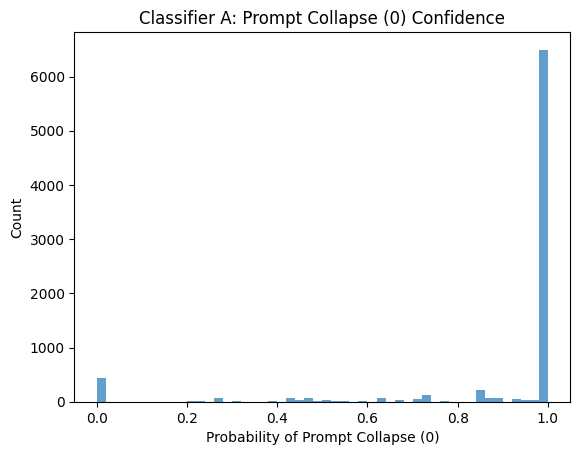

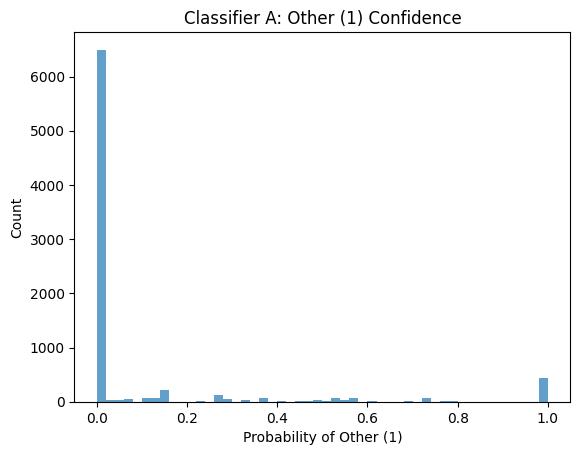

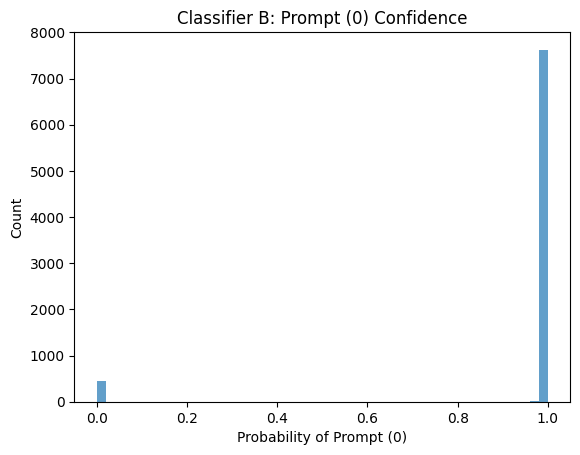

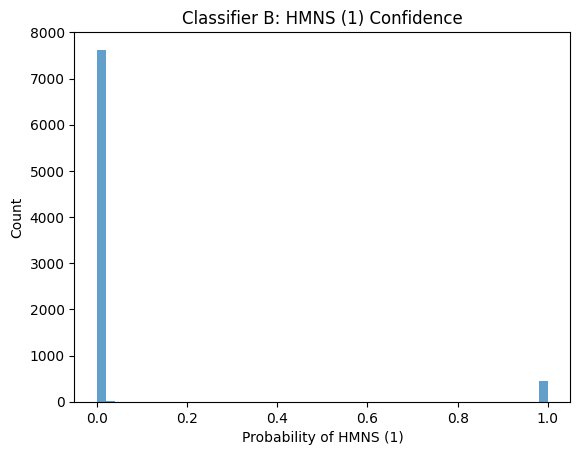

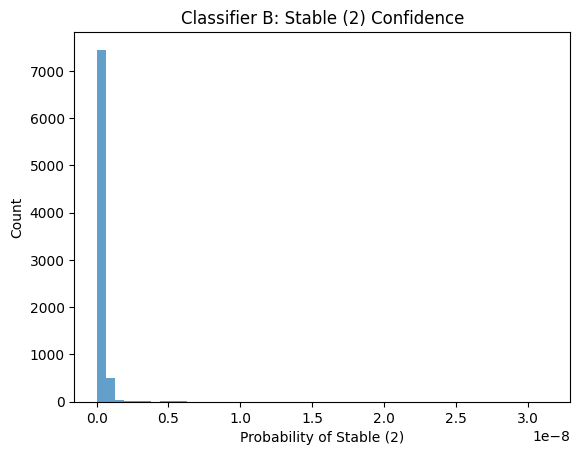

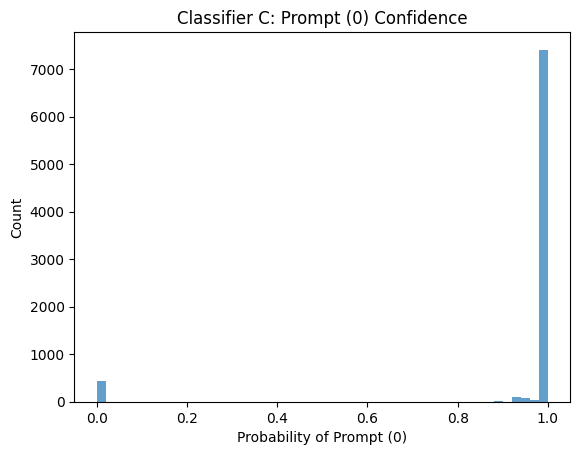

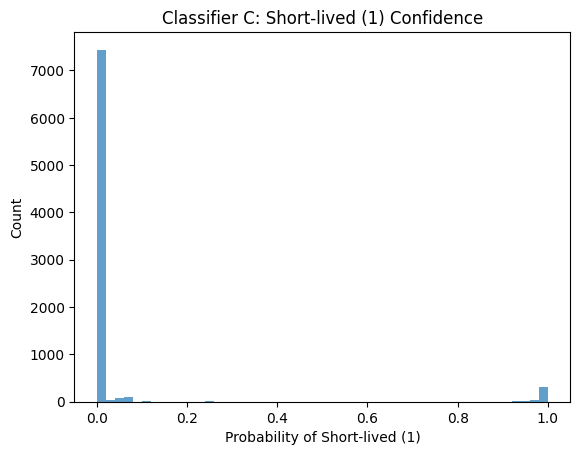

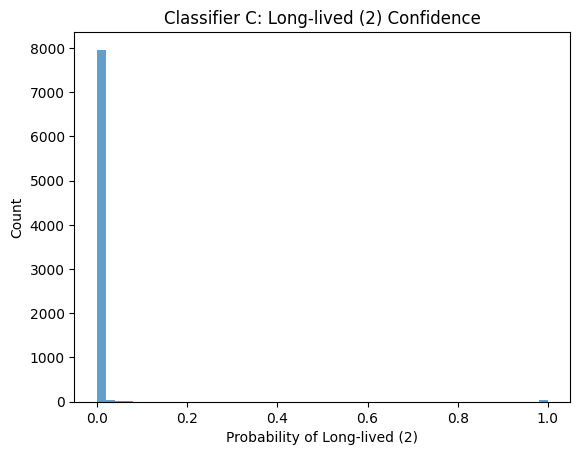

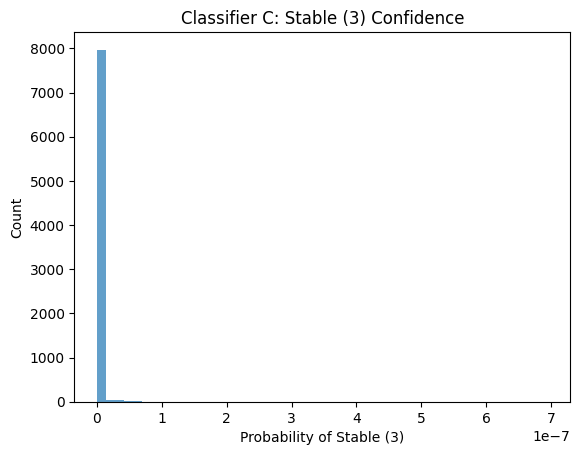

In [10]:
import matplotlib.pyplot as plt

# === Labels for each classifier ===
labels_A = ["Prompt Collapse (0)", "Other (1)"]
labels_B = ["Prompt (0)", "HMNS (1)", "Stable (2)"]
labels_C = ["Prompt (0)", "Short-lived (1)", "Long-lived (2)", "Stable (3)"]

probs = [prob_17_A, prob_17_B, prob_17_C]
titles = [labels_A, labels_B, labels_C]
clf_names = ["Classifier A", "Classifier B", "Classifier C"]

# === Plot histograms ===
for i, (prob, label_list, name) in enumerate(zip(probs, titles, clf_names)):
    for j, label in enumerate(label_list):
        plt.hist(prob[:, j], bins=50, alpha=0.7)
        plt.xlabel(f"Probability of {label}")
        plt.ylabel("Count")
        plt.title(f"{name}: {label} Confidence")
        plt.show()

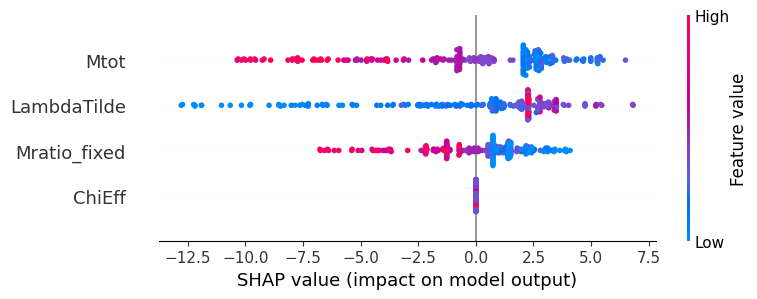

In [11]:
import shap

explainer = shap.Explainer(model_A, X_train_scaled)
shap_values = explainer(X_train_scaled)

shap.summary_plot(shap_values, features=X_train, feature_names=features)

GW190425

In [16]:
# === Step 1: Load posterior samples from GW190425 ===
with h5py.File("GW190425.h5", "r") as f:
    samples_19 = f["C01:IMRPhenomPv2_NRTidal:LowSpin/posterior_samples"][()]
    df_19 = pd.DataFrame({key: samples_19[key] for key in samples_19.dtype.names})

# === Step 2: Compute derived features ===
df_19["m1"] = df_19["mass_1"] # check if it is source mass or divide it by (1+z)
df_19["m2"] = df_19["mass_2"] #same as above
df_19["Mtot"] = df_19["m1"] + df_19["m2"]
df_19["Mratio_fixed"] = df_19["m1"] / df_19["m2"]
df_19["LambdaTilde"] = (
    (16/13) * (
        (df_19["m1"] + 12 * df_19["m2"]) * df_19["lambda_1"] +
        (df_19["m2"] + 12 * df_19["m1"]) * df_19["lambda_2"]
    ) / (df_19["Mtot"] ** 5)
)
df_19["ChiEff"] = df_19["chi_eff"]

# === Step 3: Clean ===
features = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
df_19 = df_19[features].replace([np.inf, -np.inf], np.nan).dropna()

# === Step 4: Scale ===
X_19_A = scaler_A.transform(df_19)
X_19_B = scaler_B.transform(df_19)
X_19_C = scaler_C.transform(df_19)

# === Step 5: Predict ===
pred_19_A = model_A.predict(X_19_A)
pred_19_B = model_B.predict(X_19_B)
pred_19_C = model_C.predict(X_19_C)

prob_19_A = model_A.predict_proba(X_19_A)
prob_19_B = model_B.predict_proba(X_19_B)
prob_19_C = model_C.predict_proba(X_19_C)

# === Step 6: Display ===
print("\n--- GW190425 Predictions ---")
print("Classifier A:", dict(Counter(pred_19_A)))
print("Classifier B:", dict(Counter(pred_19_B)))
print("Classifier C:", dict(Counter(pred_19_C)))


--- GW190425 Predictions ---
Classifier A: {np.int64(0): 19464, np.int64(1): 536}
Classifier B: {np.int64(0): 18618, np.int64(1): 1382}
Classifier C: {np.int64(0): 19727, np.int64(1): 224, np.int64(2): 49}


In [ ]:
samples_19


array([(1.48704906, 0.94591187, 0.03879801, 0.01445153, 0.46715847, 0.82319839, 0.12218615, 5.69887987, 1038.51289424,  359.34438014, 0.2057698 , 0.98225212, 0.88021638, 1.2402155e+09, 2.00903151, 2.21689825, 1.2402155e+09, -0.01742842, -0.01435072, -0.04424732,  1.18276860e-02, -0.02120465,  0.00125778, -0.00283355, -0.0003558 , 0.00013035,  0.01351555,  1.31230813e-02,  0.05112762, -0.01313747, -0.01920955,  0.00422208,  0.00393975, -0.00050684, 0.01258788,  0.03714592, 0.06977049, -0.04136717, 0.0065166 , -0.03918655,  0.0379661 ,  0.03524956,  0.0312949 ,  0.04204219,  0.08486375, -0.01203834,  0.05234621,  0.01733629, -0.01609446,  0.00356841, -0.01627477,  0.02894214, -0.06361752, -0.00152126,  0.03006716,  0.0138203 ,  0.08016612, 240.18757054, 19.3984375, 32.55420588, 54.63204552, 91.68278927, 153.86086624, 258.20730749, 433.32015003, 727.19224813, 1220.36458658, 2048., 19.3984375, 32.55420588, 54.63204552, 91.68278927, 153.86086624, 258.20730749, 433.32015003, 727.19224813, 12

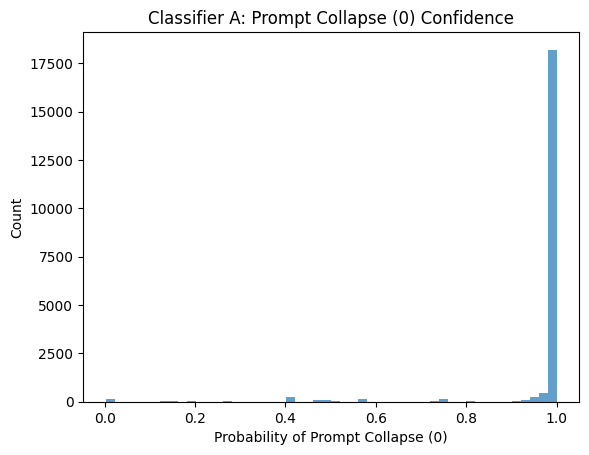

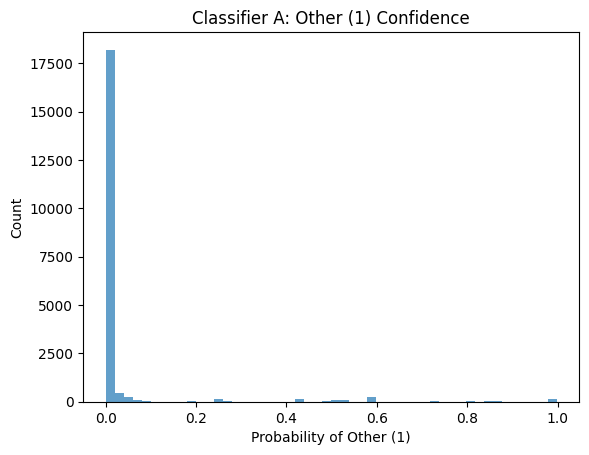

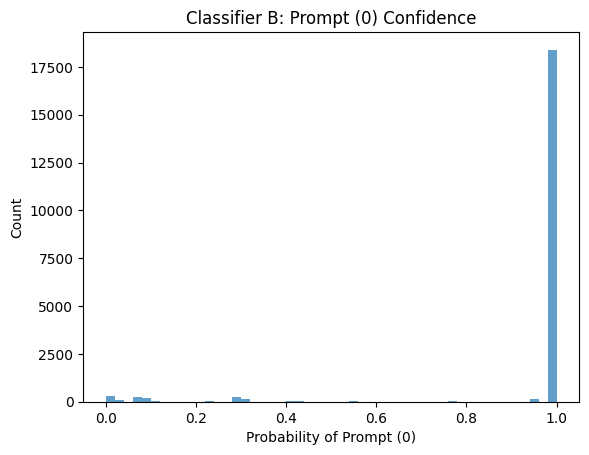

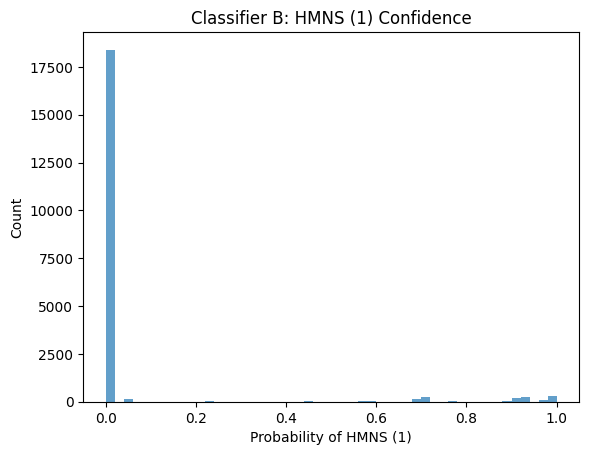

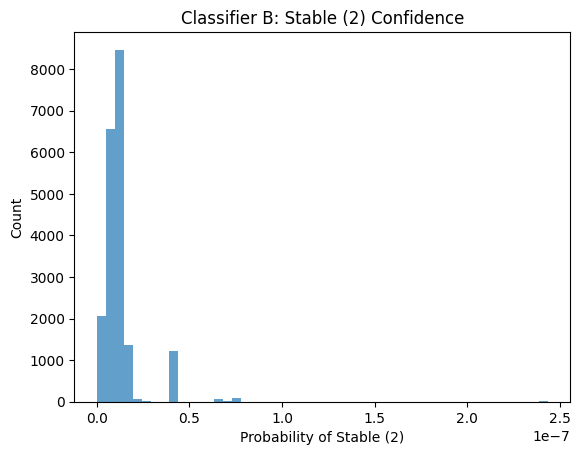

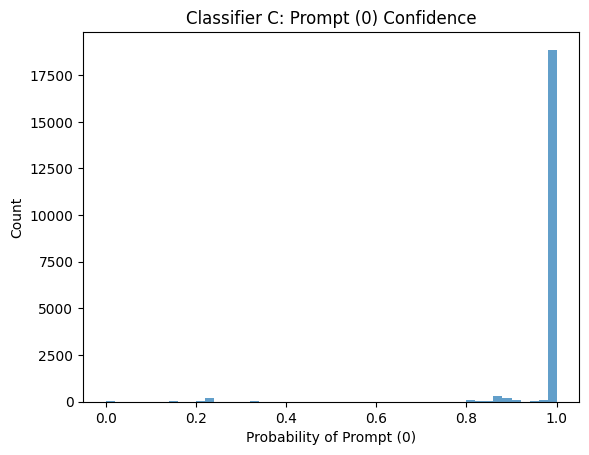

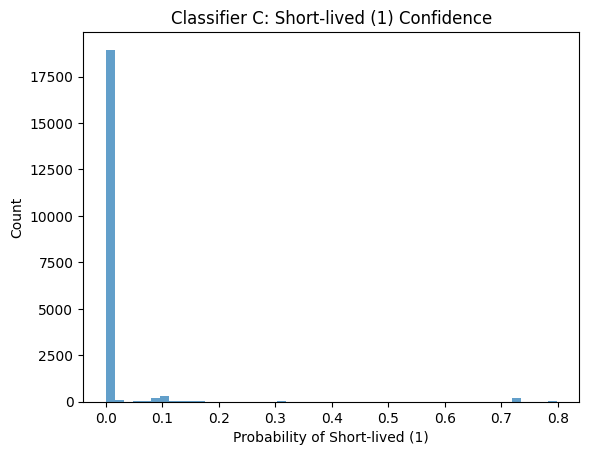

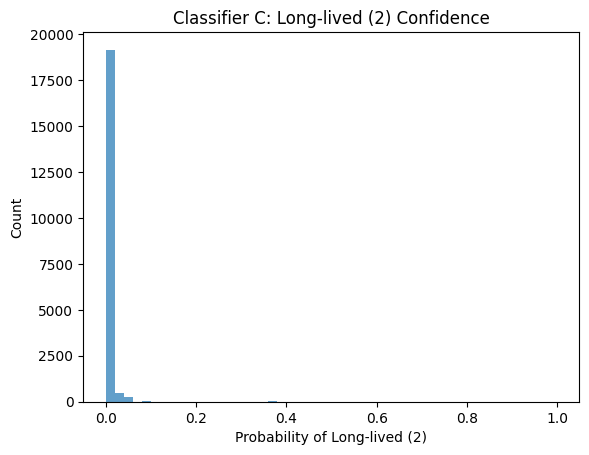

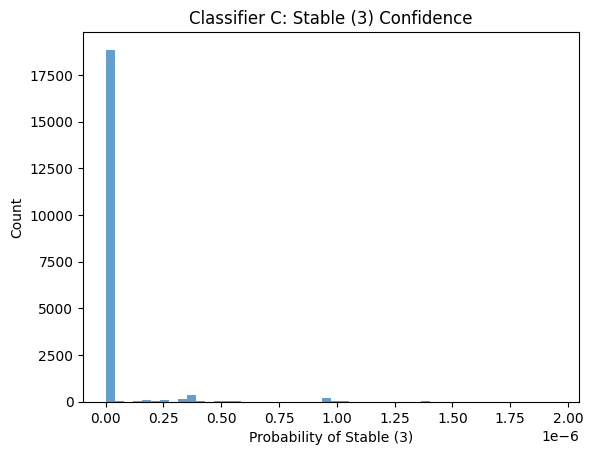

In [17]:
import matplotlib.pyplot as plt

# === Labels for each classifier ===
labels_A = ["Prompt Collapse (0)", "Other (1)"]
labels_B = ["Prompt (0)", "HMNS (1)", "Stable (2)"]
labels_C = ["Prompt (0)", "Short-lived (1)", "Long-lived (2)", "Stable (3)"]

probs = [prob_19_A, prob_19_B, prob_19_C]
titles = [labels_A, labels_B, labels_C]
clf_names = ["Classifier A", "Classifier B", "Classifier C"]

# === Plot histograms ===
for i, (prob, label_list, name) in enumerate(zip(probs, titles, clf_names)):
    for j, label in enumerate(label_list):
        plt.hist(prob[:, j], bins=50, alpha=0.7)
        plt.xlabel(f"Probability of {label}")
        plt.ylabel("Count")
        plt.title(f"{name}: {label} Confidence")
        plt.show()

In [19]:
import pandas as pd
import numpy as np

# Helper to convert probs to percentages (rounded to 1 decimal place)
def fmt(p):
    return f"{100 * p:.1f}%"

# === Classifier A: [ppcbh, prns] ===
A_17 = np.mean(prob_17_A, axis=0)
A_19 = np.mean(prob_19_A, axis=0)

# === Classifier B: [ppcbh, phmns, pnc] ===
B_17 = np.mean(prob_17_B, axis=0)
B_19 = np.mean(prob_19_B, axis=0)

# === Classifier C: [ppcbh, pshort, plong, pnc] ===
C_17 = np.mean(prob_17_C, axis=0)
C_19 = np.mean(prob_19_C, axis=0)

# Create final table
summary_table = pd.DataFrame({
    "Event": ["GW170817", "GW190425"],
    "p_PCBH_A": [fmt(A_17[0]), fmt(A_19[0])],
    "p_RNS_A": [fmt(A_17[1]), fmt(A_19[1])],
    "p_PCBH_B": [fmt(B_17[0]), fmt(B_19[0])],
    "p_HMNS_B": [fmt(B_17[1]), fmt(B_19[1])],
    "p_NC_B": [fmt(B_17[2]), fmt(B_19[2])],
    "p_PCBH_C": [fmt(C_17[0]), fmt(C_19[0])],
    "p_SHORT_C": [fmt(C_17[1]), fmt(C_19[1])],
    "p_LONG_C": [fmt(C_17[2]), fmt(C_19[2])],
    "p_NC_C": [fmt(C_17[3]), fmt(C_19[3])]
})

# Show the table
print("\nMerger Outcome Probability Table:")
display(summary_table)


Merger Outcome Probability Table:


,Event,p_PCBH_A,p_RNS_A,p_PCBH_B,p_HMNS_B,p_NC_B,p_PCBH_C,p_SHORT_C,p_LONG_C,p_NC_C
0,GW170817,89.9%,10.1%,94.5%,5.5%,0.0%,94.3%,4.9%,0.8%,0.0%
1,GW190425,97.0%,3.0%,94.0%,6.0%,0.0%,98.4%,1.2%,0.4%,0.0%


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import Counter

# === Step 1: Load the EoS posterior sample CSV ===
eos_df = pd.read_csv("EoS.csv")

# === Step 2: Derive GW-like features ===
eos_df["m1"] = eos_df["m1_source_frame_Msun"]
eos_df["m2"] = eos_df["m2_source_frame_Msun"]
eos_df["Mtot"] = eos_df["m1"] + eos_df["m2"]
eos_df["Mratio_fixed"] = eos_df["m1"] / eos_df["m2"]
eos_df["LambdaTilde"] = (
    (16 / 13) * (
        (eos_df["m1"] + 12 * eos_df["m2"]) * eos_df["Lambda1"] +
        (eos_df["m2"] + 12 * eos_df["m1"]) * eos_df["Lambda2"]
    ) / (eos_df["Mtot"] ** 5)
)

# ChiEff is missing in this dataset — we'll assume it is zero
eos_df["ChiEff"] = 0.0

# === Step 3: Clean and select features ===
features = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
eos_df = eos_df[features].replace([np.inf, -np.inf], np.nan).dropna()

# === Step 4: Scale using training scalers ===
X_eos_A = scaler_A.transform(eos_df)
X_eos_B = scaler_B.transform(eos_df)
X_eos_C = scaler_C.transform(eos_df)

# === Step 5: Predict using trained models ===
pred_eos_A = model_A.predict(X_eos_A)
pred_eos_B = model_B.predict(X_eos_B)
pred_eos_C = model_C.predict(X_eos_C)

prob_eos_A = model_A.predict_proba(X_eos_A)
prob_eos_B = model_B.predict_proba(X_eos_B)
prob_eos_C = model_C.predict_proba(X_eos_C)

# === Step 6: Display class distributions ===
print("\n--- GW+EoS Posterior Predictions ---")
print("Classifier A:", dict(Counter(pred_eos_A)))
print("Classifier B:", dict(Counter(pred_eos_B)))
print("Classifier C:", dict(Counter(pred_eos_C)))


--- GW+EoS Posterior Predictions ---
Classifier A: {np.int64(0): 2783, np.int64(1): 138}
Classifier B: {np.int64(0): 2882, np.int64(1): 39}
Classifier C: {np.int64(0): 2882, np.int64(1): 36, np.int64(2): 3}


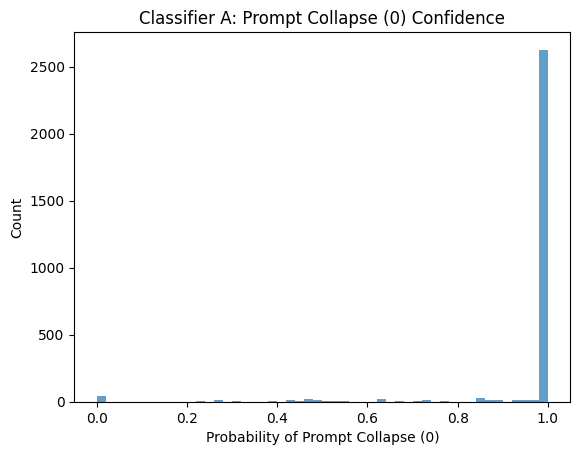

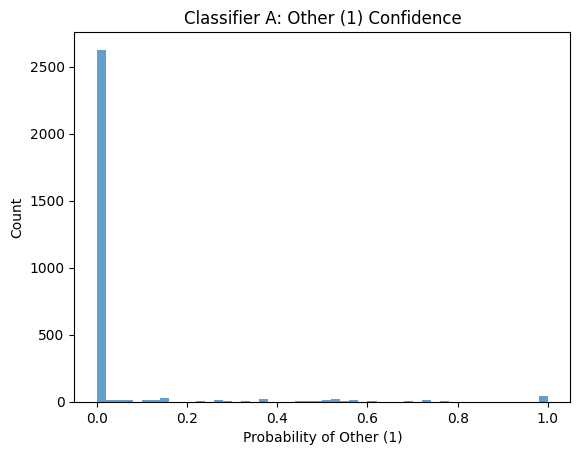

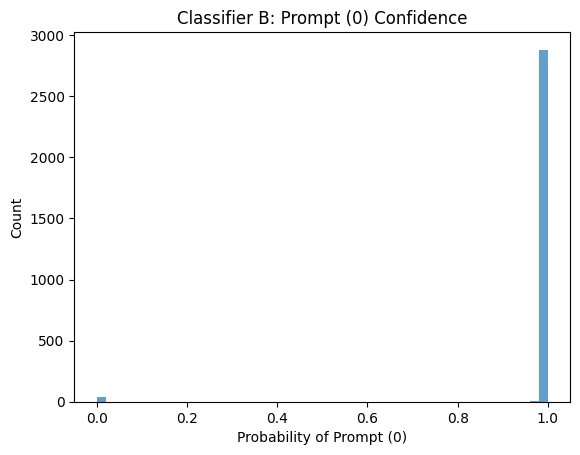

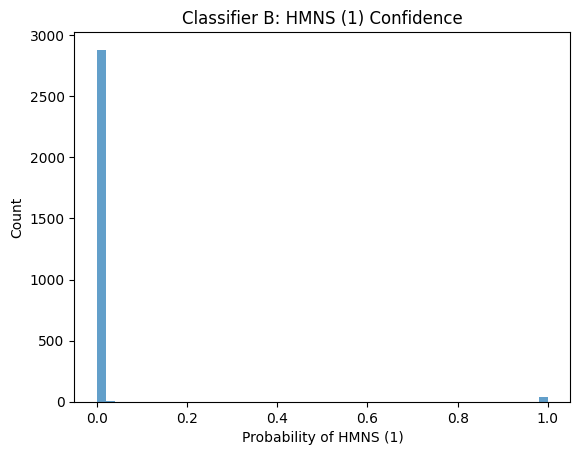

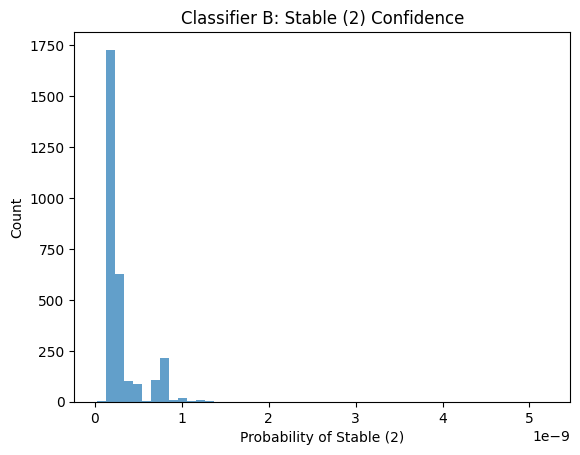

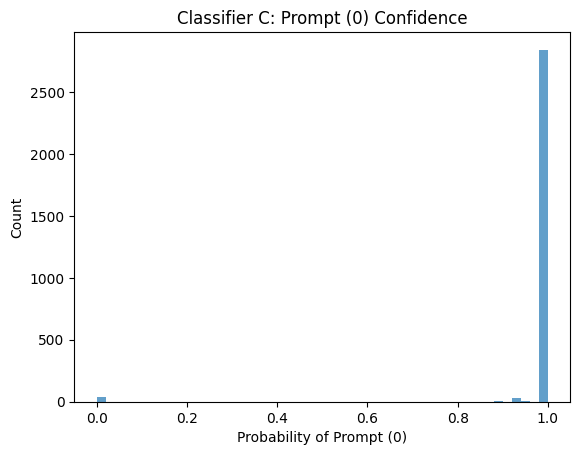

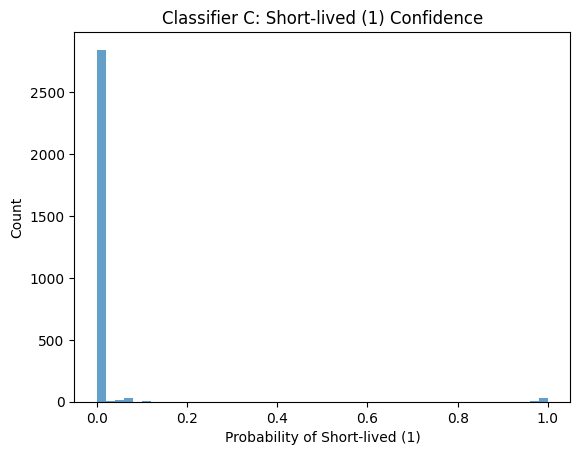

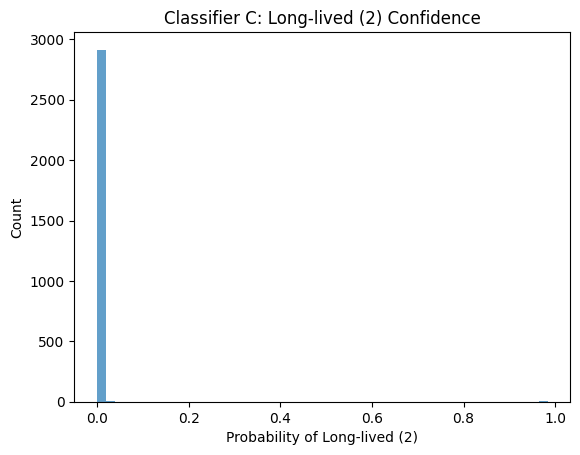

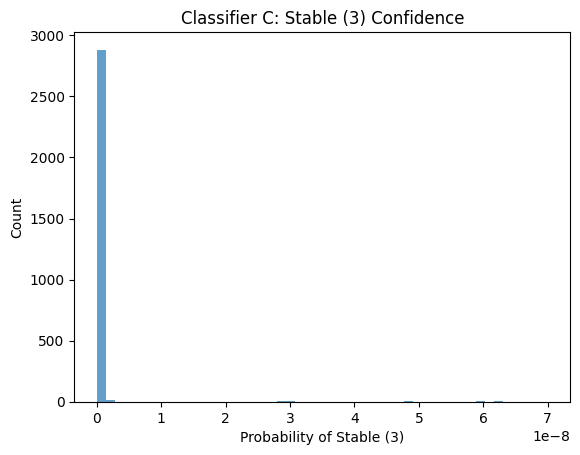

In [22]:
import matplotlib.pyplot as plt

# === Labels for each classifier ===
labels_A = ["Prompt Collapse (0)", "Other (1)"]
labels_B = ["Prompt (0)", "HMNS (1)", "Stable (2)"]
labels_C = ["Prompt (0)", "Short-lived (1)", "Long-lived (2)", "Stable (3)"]

probs = [prob_eos_A,prob_eos_B,prob_eos_C]
titles = [labels_A, labels_B, labels_C]
clf_names = ["Classifier A", "Classifier B", "Classifier C"]

# === Plot histograms ===
for i, (prob, label_list, name) in enumerate(zip(probs, titles, clf_names)):
    for j, label in enumerate(label_list):
        plt.hist(prob[:, j], bins=50, alpha=0.7)
        plt.xlabel(f"Probability of {label}")
        plt.ylabel("Count")
        plt.title(f"{name}: {label} Confidence")
        plt.show()

In [24]:
import pandas as pd
import numpy as np

# Helper to convert probs to percentages (rounded to 1 decimal place)
def fmt(p):
    return f"{100 * p:.1f}%"

# === Classifier A: [ppcbh, prns] ===
A_17 = np.mean(prob_17_A, axis=0)
A_19 = np.mean(prob_19_A, axis=0)
A_e  = np.mean(prob_eos_A, axis=0)

# === Classifier B: [ppcbh, phmns, pnc] ===
B_17 = np.mean(prob_17_B, axis=0)
B_19 = np.mean(prob_19_B, axis=0)
B_e  = np.mean(prob_eos_B, axis=0)

# === Classifier C: [ppcbh, pshort, plong, pnc] ===
C_17 = np.mean(prob_17_C, axis=0)
C_19 = np.mean(prob_19_C, axis=0)
C_e  = np.mean(prob_eos_C, axis=0)

# Create final table
summary_table = pd.DataFrame({
    "Event": ["GW170817", "GW190425","GW170817+EoS"],
    "p_PCBH_A": [fmt(A_17[0]), fmt(A_19[0]),fmt(A_e[0])],
    "p_RNS_A": [fmt(A_17[1]), fmt(A_19[1]),fmt(A_e[1])],
    "p_PCBH_B": [fmt(B_17[0]), fmt(B_19[0]),fmt(B_e[0])],
    "p_HMNS_B": [fmt(B_17[1]), fmt(B_19[1]),fmt(B_e[1])],
    "p_NC_B": [fmt(B_17[2]), fmt(B_19[2]),fmt(B_e[2])],
    "p_PCBH_C": [fmt(C_17[0]), fmt(C_19[0]),fmt(C_e[0])],
    "p_SHORT_C": [fmt(C_17[1]), fmt(C_19[1]),fmt(C_e[1])],
    "p_LONG_C": [fmt(C_17[2]), fmt(C_19[2]),fmt(C_e[2])],
    "p_NC_C": [fmt(C_17[3]), fmt(C_19[3]),fmt(C_e[3])]
})

# Show the table
print("\nMerger Outcome Probability Table:")
display(summary_table)


Merger Outcome Probability Table:


,Event,p_PCBH_A,p_RNS_A,p_PCBH_B,p_HMNS_B,p_NC_B,p_PCBH_C,p_SHORT_C,p_LONG_C,p_NC_C
0,GW170817,89.9%,10.1%,94.5%,5.5%,0.0%,94.3%,4.9%,0.8%,0.0%
1,GW190425,97.0%,3.0%,94.0%,6.0%,0.0%,98.4%,1.2%,0.4%,0.0%
2,GW170817+EoS,95.4%,4.6%,98.6%,1.4%,0.0%,98.5%,1.4%,0.1%,0.0%


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import Counter

# === Load EoS posterior samples ===
eos_df = pd.read_csv("EoS.csv")

# === Step 1: Compute derived features ===
eos_df["Mtot"] = eos_df["m1_source_frame_Msun"] + eos_df["m2_source_frame_Msun"]
eos_df["Mratio_fixed"] = eos_df["m1_source_frame_Msun"] / eos_df["m2_source_frame_Msun"]
eos_df["LambdaTilde"] = (
    (16 / 13) * (
        (eos_df["m1_source_frame_Msun"] + 12 * eos_df["m2_source_frame_Msun"]) * eos_df["Lambda1"] +
        (eos_df["m2_source_frame_Msun"] + 12 * eos_df["m1_source_frame_Msun"]) * eos_df["Lambda2"]
    ) / (eos_df["Mtot"] ** 5)
)

# === Step 2: Compute Mej_proxy using Dietrich+2017 fit ===
def ejecta_mass_fit(q, LambdaTilde):
    return 1e-3 * (1 - 2.0 / (1 + q)) * (LambdaTilde / 1000)**0.5

eos_df["Mej_proxy"] = ejecta_mass_fit(eos_df["Mratio_fixed"], eos_df["LambdaTilde"])

if "ChiEff" not in eos_df.columns:
    eos_df["ChiEff"] = 0.0


# === Step 3: Filter for KN-likely events (Mej > 0.01 Msun) ===
eos_df_kn = eos_df[eos_df["Mej_proxy"] > 3e-5].copy()
print("Samples after KN cut:", len(eos_df_kn))

# === Step 4: Clean and scale ===
features = ["Mtot", "Mratio_fixed", "LambdaTilde", "ChiEff"]
eos_df_kn = eos_df_kn[features].replace([np.inf, -np.inf], np.nan).dropna()

X_eos_kn_A = scaler_A.transform(eos_df_kn)
X_eos_kn_B = scaler_B.transform(eos_df_kn)
X_eos_kn_C = scaler_C.transform(eos_df_kn)

# === Step 5: Predict ===
pred_eos_kn_A = model_A.predict(X_eos_kn_A)
pred_eos_kn_B = model_B.predict(X_eos_kn_B)
pred_eos_kn_C = model_C.predict(X_eos_kn_C)

prob_eos_kn_A = model_A.predict_proba(X_eos_kn_A)
prob_eos_kn_B = model_B.predict_proba(X_eos_kn_B)
prob_eos_kn_C = model_C.predict_proba(X_eos_kn_C)

# === Step 6: Display ===
print("\n--- GW+EoS+KN Predictions ---")
print("Classifier A:", dict(Counter(pred_eos_kn_A)))
print("Classifier B:", dict(Counter(pred_eos_kn_B)))
print("Classifier C:", dict(Counter(pred_eos_kn_C)))

Samples after KN cut: 1306

--- GW+EoS+KN Predictions ---
Classifier A: {np.int64(0): 1177, np.int64(1): 129}
Classifier B: {np.int64(0): 1276, np.int64(1): 30}
Classifier C: {np.int64(0): 1276, np.int64(1): 27, np.int64(2): 3}


In [28]:
import pandas as pd
import numpy as np

# Helper to format as percentage string
def fmt(p):
    return f"{100 * p:.1f}%"

# === Classifier A Probabilities ===
A_17 = np.mean(prob_17_A, axis=0)
A_19 = np.mean(prob_19_A, axis=0)
A_e  = np.mean(prob_eos_A, axis=0)
A_kn = np.mean(prob_eos_kn_A, axis=0)

# === Classifier B Probabilities ===
B_17 = np.mean(prob_17_B, axis=0)
B_19 = np.mean(prob_19_B, axis=0)
B_e  = np.mean(prob_eos_B, axis=0)
B_kn = np.mean(prob_eos_B, axis=0)

# === Classifier C Probabilities ===
C_17 = np.mean(prob_17_C, axis=0)
C_19 = np.mean(prob_19_C, axis=0)
C_e  = np.mean(prob_eos_C, axis=0)
C_kn = np.mean(prob_eos_C, axis=0)

# === Final Summary Table ===
summary_table = pd.DataFrame({
    "Event": [
        "GW170817", "GW190425", "GW170817+EoS", "GW170817+EoS+KN"
    ],
    "p_PCBH_A": [fmt(A_17[0]), fmt(A_19[0]), fmt(A_e[0]), fmt(A_kn[0])],
    "p_RNS_A":  [fmt(A_17[1]), fmt(A_19[1]), fmt(A_e[1]), fmt(A_kn[1])],

    "p_PCBH_B": [fmt(B_17[0]), fmt(B_19[0]), fmt(B_e[0]), fmt(B_kn[0])],
    "p_HMNS_B": [fmt(B_17[1]), fmt(B_19[1]), fmt(B_e[1]), fmt(B_kn[1])],
    "p_NC_B":   [fmt(B_17[2]), fmt(B_19[2]), fmt(B_e[2]), fmt(B_kn[2])],

    "p_PCBH_C": [fmt(C_17[0]), fmt(C_19[0]), fmt(C_e[0]), fmt(C_kn[0])],
    "p_SHORT_C": [fmt(C_17[1]), fmt(C_19[1]), fmt(C_e[1]), fmt(C_kn[1])],
    "p_LONG_C":  [fmt(C_17[2]), fmt(C_19[2]), fmt(C_e[2]), fmt(C_kn[2])],
    "p_NC_C":    [fmt(C_17[3]), fmt(C_19[3]), fmt(C_e[3]), fmt(C_kn[3])]
})

# Display the summary table
print("\nMerger Outcome Probability Table:")
display(summary_table)


Merger Outcome Probability Table:


,Event,p_PCBH_A,p_RNS_A,p_PCBH_B,p_HMNS_B,p_NC_B,p_PCBH_C,p_SHORT_C,p_LONG_C,p_NC_C
0,GW170817,89.9%,10.1%,94.5%,5.5%,0.0%,94.3%,4.9%,0.8%,0.0%
1,GW190425,97.0%,3.0%,94.0%,6.0%,0.0%,98.4%,1.2%,0.4%,0.0%
2,GW170817+EoS,95.4%,4.6%,98.6%,1.4%,0.0%,98.5%,1.4%,0.1%,0.0%
3,GW170817+EoS+KN,91.4%,8.6%,98.6%,1.4%,0.0%,98.5%,1.4%,0.1%,0.0%


In [1]:
import json
import numpy as np
import pandas as pd
from collections import Counter
from pathlib import Path

in_path = Path("GW170817_KN_GRB_result.json")
out_post_csv = in_path.with_suffix(".posterior.csv")
out_meta_csv = in_path.with_suffix(".meta.csv")

# 1) Load JSON
with open(in_path, "r") as f:
    data = json.load(f)

if isinstance(data, list):
    raise ValueError("Expected a dict-style JSON; got a list. (We can handle that if you share a small sample.)")

# 2) Flatten one row to inspect keys
df0 = pd.json_normalize(data)

# 3) Grab only posterior sample arrays
post_cols = [c for c in df0.columns if c.startswith("posterior.content.")]
if not post_cols:
    raise ValueError("No 'posterior.content.*' keys found.")

# pick the most-common array length among posterior columns (the sample count)
lengths = {c: len(df0[c].iloc[0]) for c in post_cols}
target_len = Counter(lengths.values()).most_common(1)[0][0]
keep_cols = [c for c, L in lengths.items() if L == target_len]

# 4) Build sample-by-parameter DataFrame
df_post = pd.DataFrame({
    c.replace("posterior.content.", ""): np.asarray(df0[c].iloc[0])
    for c in keep_cols
})

# 5) Save posterior samples to CSV
df_post.to_csv(out_post_csv, index=False)
print(f"Posterior CSV written: {out_post_csv}   ({df_post.shape[0]} rows × {df_post.shape[1]} cols)")

# 6) Save scalar metadata (non-list fields) to a 1-row CSV (handy reference)
def is_listlike(v):
    return isinstance(v, (list, tuple, np.ndarray, dict))

meta = {}
for k, v in data.items():
    if not is_listlike(v):
        meta[k] = v

# Also include any normalized keys that aren’t listlike
for col in df0.columns:
    v = df0[col].iloc[0]
    if not is_listlike(v):
        meta[col] = v

pd.DataFrame([meta]).to_csv(out_meta_csv, index=False)
print(f"Metadata CSV written: {out_meta_csv}   (1 row × {len(meta)} cols)")

Posterior CSV written: GW170817_KN_GRB_result.posterior.csv   (8649 rows × 166 cols)
Metadata CSV written: GW170817_KN_GRB_result.meta.csv   (1 row × 1301 cols)


In [2]:
import json
import numpy as np
import pandas as pd
from collections import Counter
from pathlib import Path

# ---- input/output paths ----
in_path = Path("GW170817_result.json")   # change if your filename differs
out_csv = in_path.with_suffix(".posterior.csv")

# ---- load JSON ----
with open(in_path, "r") as f:
    data = json.load(f)

if isinstance(data, list):
    raise ValueError("Expected a dict-style JSON (with 'posterior.content.*' keys), got a list.")

# ---- flatten top-level dict to one-row DataFrame ----
df0 = pd.json_normalize(data)

# ---- find posterior arrays and pick a consistent sample length ----
post_cols = [c for c in df0.columns if c.startswith("posterior.content.")]
if not post_cols:
    raise ValueError("No 'posterior.content.*' keys found in the JSON.")

lengths = {c: len(df0[c].iloc[0]) for c in post_cols}
target_len = Counter(lengths.values()).most_common(1)[0][0]  # most common length = #samples
keep_cols = [c for c, L in lengths.items() if L == target_len]

# ---- build sample-by-parameter DataFrame ----
df_post = pd.DataFrame({
    c.replace("posterior.content.", ""): np.asarray(df0[c].iloc[0])
    for c in keep_cols
})

# ---- write CSV ----
df_post.to_csv(out_csv, index=False)
print(f"Wrote: {out_csv}  ({df_post.shape[0]} rows × {df_post.shape[1]} cols)")

# optional: quick peek
print(df_post.head(3))

Wrote: GW170817_result.posterior.csv  (88659 rows × 61 cols)
   chirp_mass  mass_ratio       a_1       a_2    tilt_1    tilt_2    phi_12  \
0    1.197563    0.872848  0.021719  0.030713  1.205458  1.732692  1.114814   
1    1.197606    0.857758  0.030935  0.039432  2.489907  0.174674  4.187202   
2    1.197605    0.785230  0.022132  0.018190  1.041670  1.334458  0.961572   

     phi_jl  luminosity_distance  cos_theta_jn  ...     phi_2   chi_eff  \
0  0.645888            40.281580     -0.900235  ...  4.311045  0.001836   
1  2.339845            31.819652     -0.616642  ...  3.646962  0.004690   
2  3.239969            24.221405     -0.487603  ...  0.718986  0.008131   

   chi_1_in_plane  chi_2_in_plane     chi_p  cos_tilt_1  cos_tilt_2  \
0        0.020285        0.030311  0.025949    0.357266   -0.161190   
1        0.018763        0.006853  0.018763   -0.795063    0.984783   
2        0.019106        0.017684  0.019106    0.504779    0.234145   

   comoving_distance  chirp_mass_sou

In [3]:
import json
import numpy as np
import pandas as pd
from collections import Counter
from pathlib import Path

in_path = Path("GW170817_KN_result.json")   # <- this file
out_csv = in_path.with_suffix(".posterior.csv")

# Load JSON
with open(in_path, "r") as f:
    data = json.load(f)
if isinstance(data, list):
    raise ValueError("Expected a dict-style JSON with 'posterior.content.*' keys, got a list.")

# One-row normalize to inspect keys
df0 = pd.json_normalize(data)

# Find posterior arrays and pick the consistent sample length
post_cols = [c for c in df0.columns if c.startswith("posterior.content.")]
if not post_cols:
    raise ValueError("No 'posterior.content.*' keys found in the JSON.")

lengths = {c: len(df0[c].iloc[0]) for c in post_cols}
target_len = Counter(lengths.values()).most_common(1)[0][0]
keep_cols = [c for c, L in lengths.items() if L == target_len]

# Build sample-by-parameter DataFrame
df_post = pd.DataFrame({
    c.replace("posterior.content.", ""): np.asarray(df0[c].iloc[0])
    for c in keep_cols
})

# Write CSV
df_post.to_csv(out_csv, index=False)
print(f"Wrote: {out_csv}  ({df_post.shape[0]} rows × {df_post.shape[1]} cols)")
print(df_post.head(3))

Wrote: GW170817_KN_result.posterior.csv  (5991 rows × 160 cols)
   chirp_mass  mass_ratio       a_1       a_2    tilt_1    tilt_2    phi_12  \
0    1.197630    0.968193  0.025597  0.020956  0.770822  2.394690  3.565756   
1    1.197637    0.803114  0.015689  0.038760  1.906992  0.943502  5.113521   
2    1.197650    0.977743  0.042400  0.020927  1.750651  0.405257  5.877918   

     phi_jl  luminosity_distance  cos_theta_jn  ...     phi_2   chi_eff  \
0  3.358213            50.446058     -0.971981  ...  6.258377  0.001765   
1  2.793142            51.359008     -0.998512  ...  6.194418  0.007263   
2  0.832807            41.355673     -0.820652  ...  3.305849  0.005673   

   chi_1_in_plane  chi_2_in_plane     chi_p  cos_tilt_1  cos_tilt_2  \
0        0.017834        0.014237  0.017834    0.717338   -0.733796   
1        0.014811        0.031381  0.024428   -0.329898    0.586956   
2        0.041716        0.008251  0.041716   -0.178886    0.919001   

   comoving_distance  chirp_mass_

In [4]:
import json
import numpy as np
import pandas as pd
from collections import Counter
from pathlib import Path

# === CONFIG ===
in_path = Path("gw190425_result.json")      # <-- change if your filename differs
out_post_csv = in_path.with_suffix(".posterior.csv")
out_meta_csv = in_path.with_suffix(".meta.csv")  # optional; set to None to skip

# === LOAD JSON ===
with open(in_path, "r") as f:
    data = json.load(f)

if isinstance(data, list):
    raise ValueError("Expected a dict-style JSON (bilby result). Got a list.")

# Two common layouts:
# A) flat-ish with keys like 'posterior.content.mass_1', ...
# B) nested dict: data['posterior']['content'] is a dict of arrays
post_arrays = None
if isinstance(data.get("posterior"), dict) and isinstance(data["posterior"].get("content"), dict):
    # Layout B: direct dict of arrays
    content = data["posterior"]["content"]
    # Keep only entries that are list/array-like
    post_arrays = {k: np.asarray(v) for k, v in content.items() if isinstance(v, (list, tuple))}
else:
    # Layout A: flatten via json_normalize and filter columns
    df0 = pd.json_normalize(data)
    post_cols = [c for c in df0.columns if c.startswith("posterior.content.")]
    if not post_cols:
        raise ValueError("No 'posterior.content.*' keys found in JSON.")
    # Build dict of arrays from the one-row df0
    post_arrays = {c.replace("posterior.content.", ""): np.asarray(df0[c].iloc[0])
                   for c in post_cols if isinstance(df0[c].iloc[0], (list, tuple))}

if not post_arrays:
    raise ValueError("Found no posterior arrays to export.")

# === CHOOSE A CONSISTENT SAMPLE LENGTH (the majority length) ===
lengths = {k: len(v) for k, v in post_arrays.items()}
target_len = Counter(lengths.values()).most_common(1)[0][0]
keep = [k for k, L in lengths.items() if L == target_len]

# Build sample-by-parameter DataFrame
df_post = pd.DataFrame({k: post_arrays[k] for k in keep})
df_post.to_csv(out_post_csv, index=False)
print(f"[OK] Wrote posterior CSV: {out_post_csv}  ({df_post.shape[0]} rows × {df_post.shape[1]} cols)")

# === OPTIONAL: write scalar metadata (non-list things) ===
def is_listlike(x):
    return isinstance(x, (list, tuple, dict))

if out_meta_csv is not None:
    meta = {}
    # top-level scalars
    for k, v in data.items():
        if not is_listlike(v):
            meta[k] = v
    # priors summary (optional): store just the names present
    if "priors" in data and isinstance(data["priors"], dict):
        meta["priors_keys"] = ",".join(sorted(data["priors"].keys()))
    pd.DataFrame([meta]).to_csv(out_meta_csv, index=False)
    print(f"[OK] Wrote meta CSV: {out_meta_csv}  (1 row × {len(meta)} cols)")

[OK] Wrote posterior CSV: gw190425_result.posterior.csv  (65900 rows × 59 cols)
[OK] Wrote meta CSV: gw190425_result.meta.csv  (1 row × 18 cols)
